### Import Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

### Data loading and proprocessing

In [2]:
df = pd.read_csv(r'C:\Users\acer\Desktop\5th Semester\Data Mining\project\Sales Transaction v.4a.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [4]:
# Convert Date DataType to Datetime
dateFormat = '%m/%d/%Y'
df['Date'] = pd.to_datetime(df['Date'],format = dateFormat)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [5]:
# Create New Columns : TotalMoney
df['TotalMoney'] = df['Price'] * df['Quantity']

# Create New Columns : Month
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Create New Columns : Year
df['Year'] = pd.DatetimeIndex(df['Date']).year

df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalMoney,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12,2019


In [6]:
# Check Null Value 
df.isnull().sum() 

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
TotalMoney        0
Month             0
Year              0
dtype: int64

In [7]:
# Delete /  Drop Unecessary Data 
df = df.drop(['CustomerNo'], axis = 1)
df.head() 

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Country,TotalMoney,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,United Kingdom,257.64,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,United Kingdom,383.40,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,United Kingdom,138.36,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,United Kingdom,127.80,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,United Kingdom,71.64,12,2019


### Exploratory Data Analysis

##### 10 Transaction that Give Highest Total Money

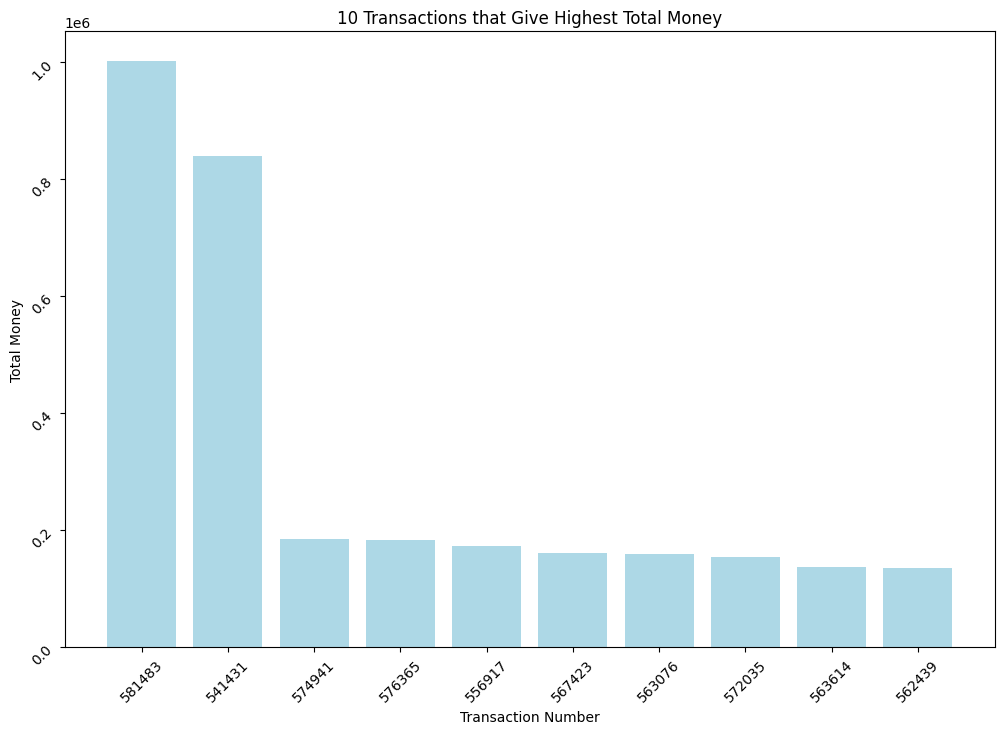

In [8]:

# Variable to store data
listTransaction = df['TransactionNo'].unique()
listTotalMoney = []

# Loop for Store Data
for i in listTransaction:
    totalMoney = df['TotalMoney'].loc[df['TransactionNo'] == i].sum()
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictTransaction = {
    'TransactionNo' : listTransaction,
    'TotalMoney' : listTotalMoney
}

# Adjust DataFrame
dfTransaction = pd.DataFrame(dictTransaction)
dfTransaction = dfTransaction.sort_values('TotalMoney',ascending=False).head(10)
dfTransaction = dfTransaction.reset_index(drop=True)

# Create Figure
plt.figure(figsize = (12,8))
plt.bar(data = dfTransaction, x = 'TransactionNo',height = 'TotalMoney', color = 'lightblue')
plt.title('10 Transactions that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Transaction Number')
plt.ylabel('Total Money')
plt.show()

In [10]:
# Save to CSV
dfTransaction.to_csv('top_10_transactions.csv', index=False)

##### 10 Products that Give Highest Total Money

In [9]:
# Variable to Store Data
listProduct = df['ProductNo'].unique()
listTotalMoney = []

# Loop for Store Data
for i in listProduct:
    totalMoney = df['TotalMoney'].loc[df['ProductNo'] == i].sum()
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictProduct = {
    'ProductNo' : listProduct,
    'TotalMoney' : listTotalMone
}

# Adjust DataFrame
dfProduct = pd.DataFrame(dictProduct)
dfProduct = dfProduct.sort_values('TotalMoney',ascending=False).head(10)
dfProduct = dfProduct.reset_index(drop=True)

# Create Figure
plt.figure(figsize = (12,8))
plt.bar(data = dfProduct, x = 'ProductNo',height = 'TotalMoney', color = 'lightblue')
plt.title('10 Products that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Product Number')
plt.ylabel('Total Money')
plt.show()

# Show Product Number, Product Name and Total Money
listProductName = []
for i in dfProduct['ProductNo']:
    a = df['ProductName'].loc[df['ProductNo'] == i].unique()[0]
    listProductName.append(a) 
dfProduct['ProductName'] = listProductName
print(dfProduct)

KeyboardInterrupt: 

##### 10 Products Price that Give Highest TOtal Money

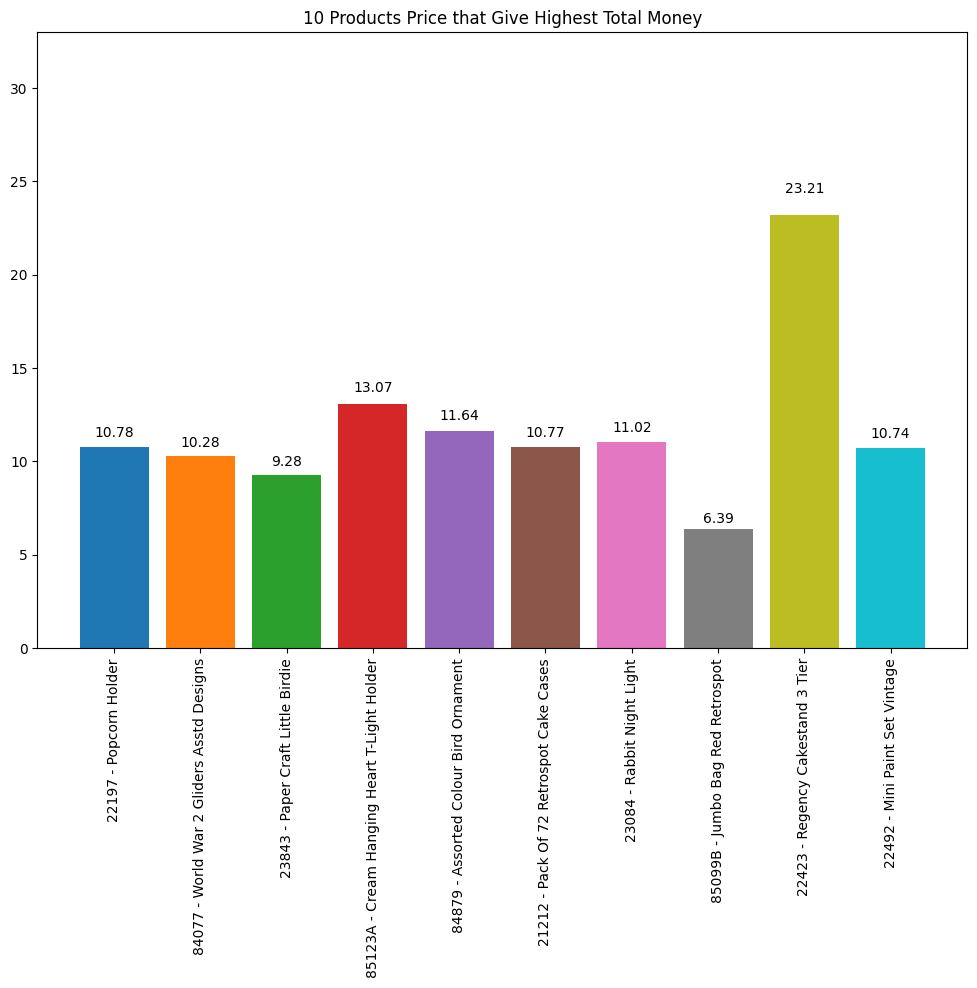

In [ ]:
plt.figure(figsize=(12,8))

listProductNo = dfProduct['ProductNo'].unique().copy()
listProductName = dfProduct['ProductName'].unique().copy()

for i in range(len(listProductNo)):
    pricePiece = round(df['Price'].loc[df['ProductNo']==listProductNo[i]].mean(),2)
    labelx = listProductNo[i]+' - '+listProductName[i]
    plt.text(labelx,pricePiece*1.05,pricePiece,ha='center')
    plt.bar(x = labelx, height = pricePiece)

plt.ylim(0,33)
plt.title('10 Products Price that Give Highest Total Money')
plt.xticks(rotation = 90)
plt.show()

##### 10 Products Total Quantity that Give Highest Total Money

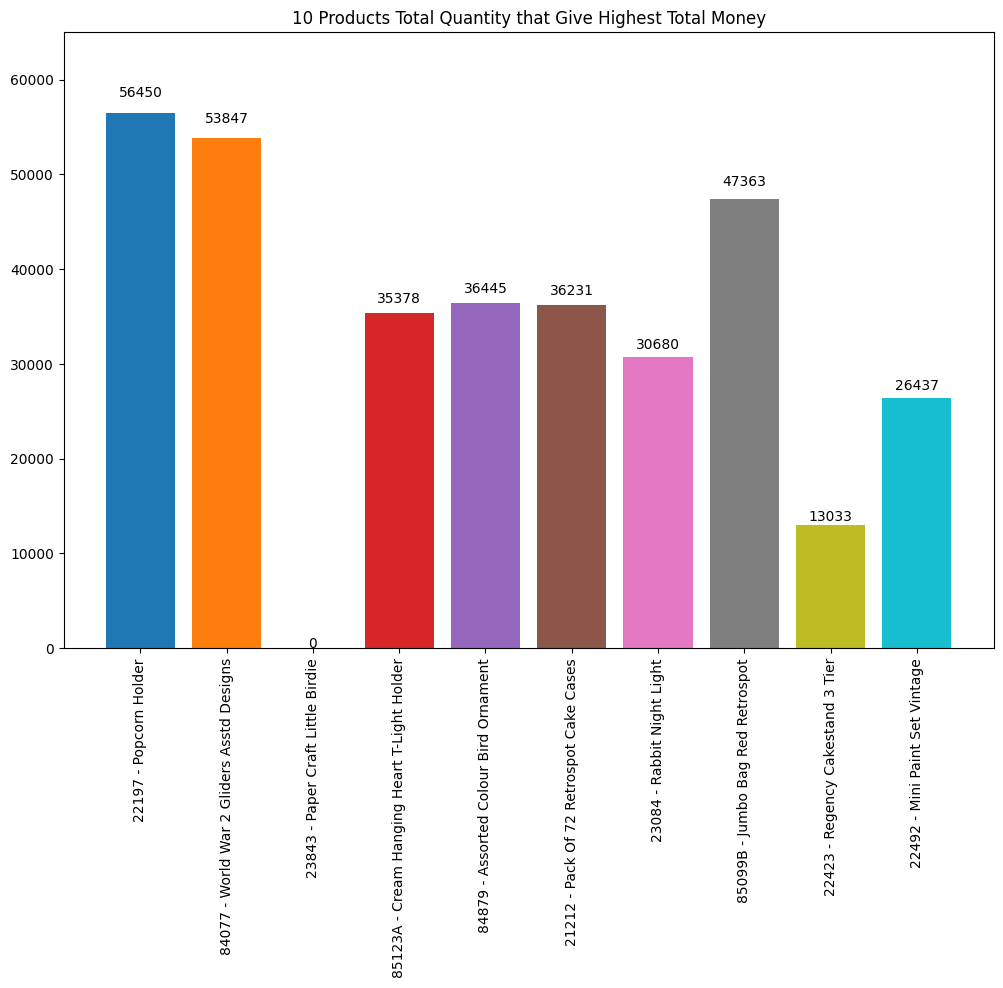

In [ ]:
plt.figure(figsize=(12,8))

listProductNo = dfProduct['ProductNo'].unique().copy()
listProductName = dfProduct['ProductName'].unique().copy()

for i in range(len(listProductNo)):
    totalQuantity = round(df['Quantity'].loc[df['ProductNo']==listProductNo[i]].sum(),2)
    labelx = listProductNo[i]+' - '+listProductName[i]
    plt.text(labelx,totalQuantity*1.03,totalQuantity,ha='center')
    plt.bar(x = labelx, height = totalQuantity)

plt.ylim(0,65000)
plt.title('10 Products Total Quantity that Give Highest Total Money')
plt.xticks(rotation = 90)
plt.show()

##### 10 Countries that GIve Total Highest Money

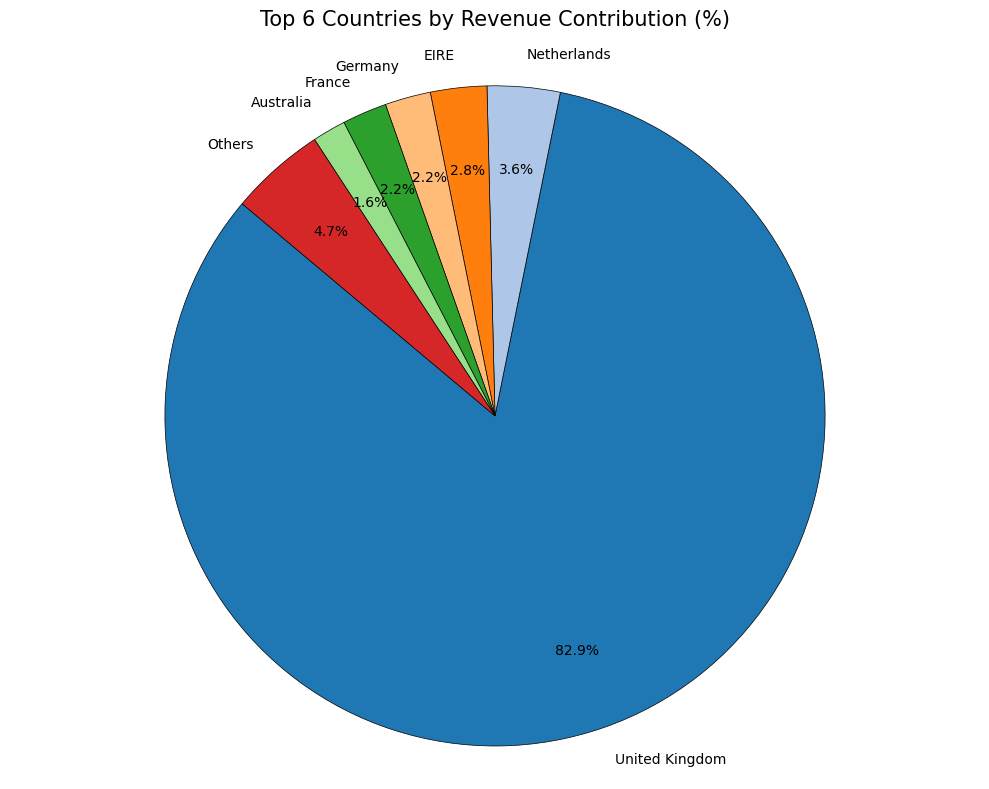

Top 6 Countries + Others:
      CountryName   TotalMoney
0  United Kingdom  49994030.17
1     Netherlands   2147811.39
2            EIRE   1660645.07
3         Germany   1350265.40
4          France   1316880.98
5       Australia    988756.35
0          Others   2821634.90


In [ ]:
# Variable to Store
listCountry = df['Country'].unique()
listTotalMoney = []

# Loop to Store Data
for i in listCountry:
    totalMoney = round(df['TotalMoney'].loc[df['Country'] == i].sum(), 2)
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictCountry = {
    'CountryName': listCountry,
    'TotalMoney': listTotalMoney
}

# Adjust DataFrame
dfCountry = pd.DataFrame(dictCountry)
dfCountry = dfCountry.sort_values('TotalMoney', ascending=False).reset_index(drop=True)

# Keep top 6 countries, group the rest into "Others"
top6 = dfCountry.head(6)
others = pd.DataFrame({
    'CountryName': ['Others'],
    'TotalMoney': [dfCountry['TotalMoney'][6:].sum()]
})
dfCountryFinal = pd.concat([top6, others])

# Create Pie Chart
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20.colors  # Different colors for each slice

# Plot the pie chart with adjusted label positions
wedges, texts, autotexts = plt.pie(
    dfCountryFinal['TotalMoney'],
    labels=dfCountryFinal['CountryName'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 10},
    pctdistance=0.75,  # Move percentage labels closer to center (0.5 = halfway)
    labeldistance=1.1,  # Adjust country label distance from center
)

# Tilt percentage labels toward center (adjust rotation)
for autotext in autotexts:
    autotext.set_rotation_mode('anchor')  # Smooth rotation
    autotext.set_ha('center')  # Horizontal alignment
    autotext.set_va('center')  # Vertical alignment

plt.title('Top 6 Countries by Revenue Contribution (%)', pad=20, fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Show the breakdown (optional)
print("Top 6 Countries + Others:")
print(dfCountryFinal)

##### Total Money Every Months in 2019

c:\Users\acer\anaconda3\Lib\site-packages\matplotlib\text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
c:\Users\acer\anaconda3\Lib\site-packages\matplotlib\text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


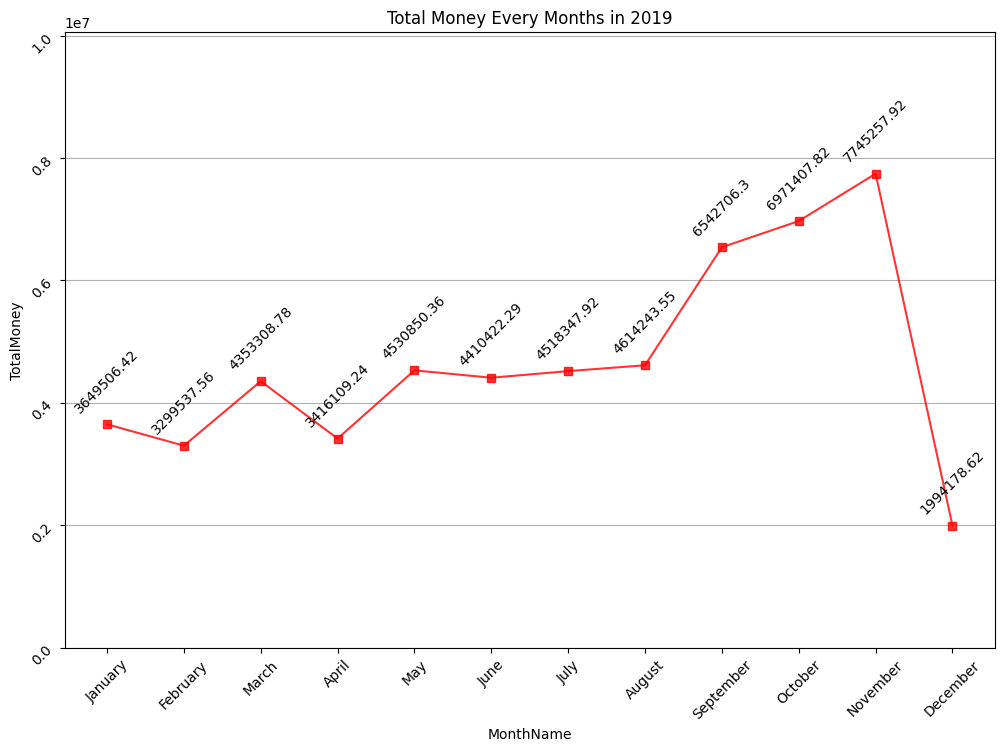

In [ ]:
# Variable to Store
listMonth = []
listTotalMoney = []
for i in df['Month'].unique():
    monthName = dt.datetime.strptime(str(i), "%m")
    monthName = monthName.strftime("%B")
    listMonth.append(monthName)
for i in df['Month'].unique():
    totalMoney = round(df['TotalMoney'].loc[(df['Month']==i)&(df['Year']==2019)].sum(),2)
    listTotalMoney.append(totalMoney)
    
# Dictionary for DataFrame
dictMonth = {
    'MonthName' : listMonth,
    'TotalMoney' : listTotalMoney
}

# Adjust Data Frame
dfMonth = pd.DataFrame(dictMonth)
dfMonth = dfMonth.iloc[::-1]


# Create Figure
plt.figure(figsize = (12,8))
plt.plot(dfMonth['MonthName'], dfMonth['TotalMoney'], color = 'Red', marker = 's',alpha = 0.8)
plt.title('Total Money Every Months in 2019')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('MonthName')
plt.ylabel('TotalMoney')
for i in dfMonth['MonthName']: 
    text = str(dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i].values[0])
    y = dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i]+(dfMonth['TotalMoney'].min()*0.1)
    plt.text(i,y,text, ha = 'center', rotation = 45) 
plt.ylim(0,dfMonth['TotalMoney'].max()*1.3)
plt.grid(axis = 'y')
plt.show()

##### Country that Gives Highest Total Money from Each Month

In [ ]:
def searchTotalMoney(country,month):
    return round(df['TotalMoney'].loc[(df['Country'] == country)&(df['Month'] == month)].sum(),2)

def searchHighestTotalMoneyCountry(month):
    listMoney = []
    maxCountry = 'none'
    for i in listCountry:
        total = searchTotalMoney(i,month)
        listMoney.append(total)
        maxMoney = max(listMoney) 
        if total >= maxMoney:
            maxCountry = i 
    return([maxMoney,maxCountry])

listTotalMoney = []
listHighCountry = []

for i in df['Month'].unique():
    templist = searchHighestTotalMoneyCountry(i)
    listTotalMoney.append(templist[0])
    listHighCountry.append(templist[1])

dictHighCountMonth = {
    'Month' : listMonth,
    'Country Name' : listHighCountry,
    'Total Money' : listTotalMoney
}             

dfCountMonth = pd.DataFrame(dictHighCountMonth)
dfCountMonth = dfCountMonth.iloc[::-1]
dfCountMonth = dfCountMonth.reset_index(drop = True)
dfCountMonth


,Month,Country Name,Total Money
0,January,United Kingdom,2766521.62
1,February,United Kingdom,2704022.15
2,March,United Kingdom,3537492.90
3,April,United Kingdom,3053768.60
4,May,United Kingdom,3689507.59
5,June,United Kingdom,3500065.77
6,July,United Kingdom,3765557.98
7,August,United Kingdom,3667938.41
8,September,United Kingdom,5480320.68
9,October,United Kingdom,5632406.43


##### Total Money each Month that is Received from Top 10 Products that Give Highest Total MOney in 2019

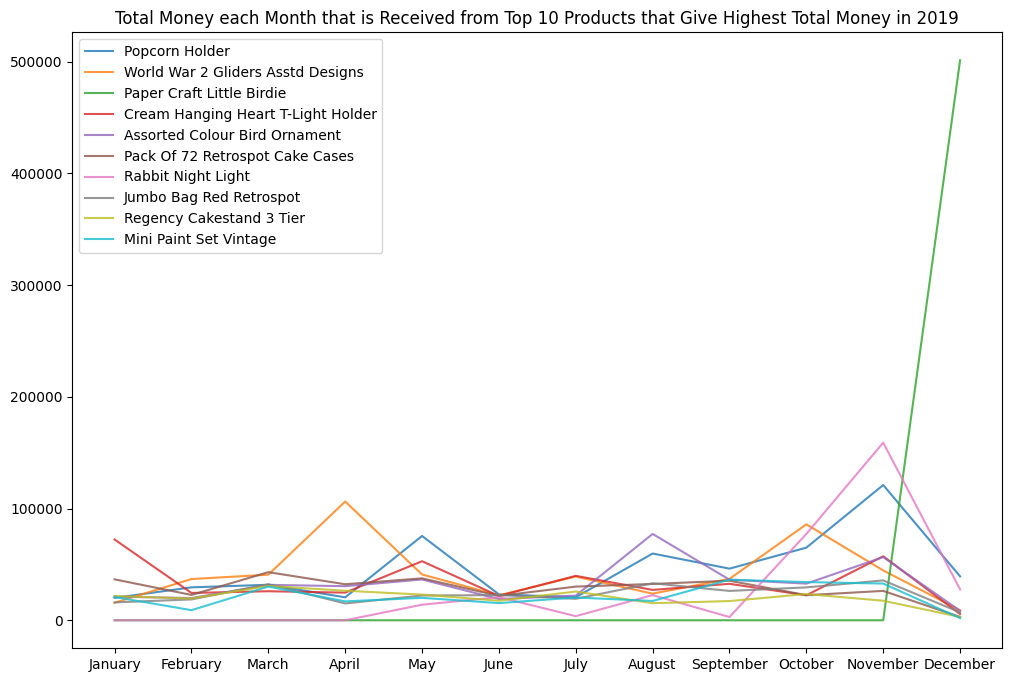

In [ ]:
topTenCountry = dfCountry['CountryName'].unique().copy()
listMonthTopTen = listMonth.reverse()
listMonthTopTen = listMonth

plt.figure(figsize = (12,8))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['TotalMoney'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Money each Month that is Received from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

##### Total Quantity each Month from Top 10 Products that Give Highest Total MOney in 2019

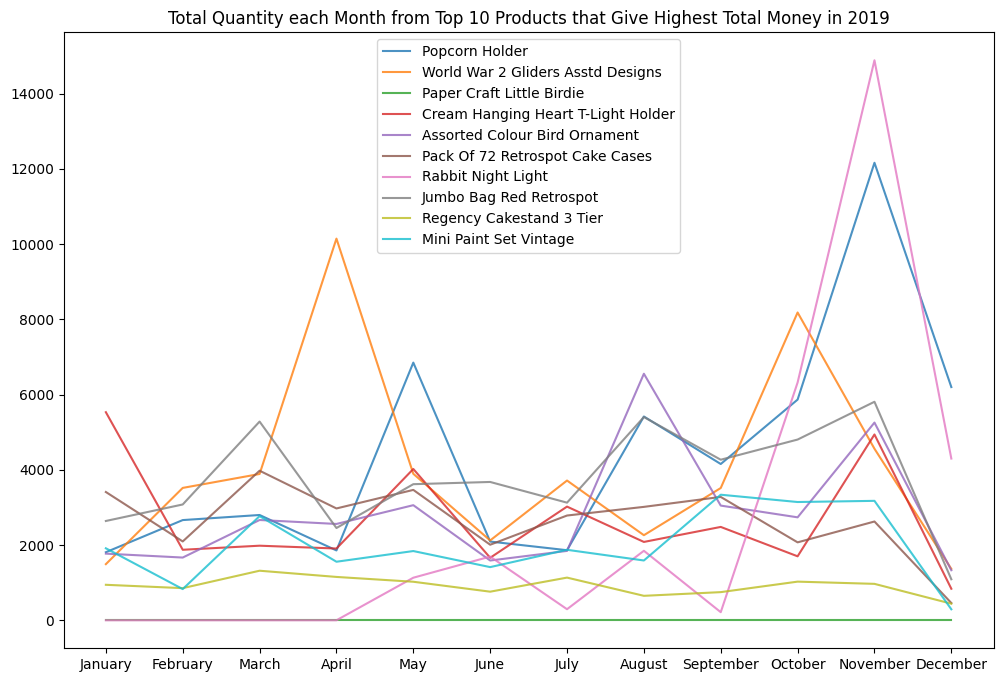

In [ ]:
plt.figure(figsize = (12,8))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['Quantity'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Quantity each Month from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

### Revenue Prediction
**Goal**: Predict future revenue based on historical data.